In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

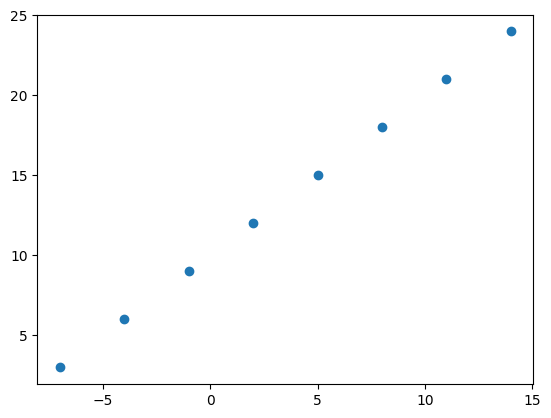

In [2]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
X = tf.constant(X)
y = tf.constant(y)

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [5]:
X[0], y[0] # --> input_shape, output_shape

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

## Make a model

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 171ms/step - loss: 13.6967 - mae: 13.6967
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 13.5642 - mae: 13.5642
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 13.4317 - mae: 13.4317
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 13.2992 - mae: 13.2992
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 13.1667 - mae: 13.1667


In [7]:
# Make a Prediction

model.predict([17.0])

1/1 [==============================] - 0s 50ms/step


array([[2.069571]], dtype=float32)

## Improving a Model

1. longer trains

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 148ms/step - loss: 14.2718 - mae: 14.2718
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 14.1393 - mae: 14.1393
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 14.0068 - mae: 14.0068
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8743 - mae: 13.8743
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7418 - mae: 13.7418
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 13.6093 - mae: 13.6093
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4768 - mae: 13.4768
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.3443 - mae: 13.3443
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2118 - mae: 13.2118
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0793 - mae: 13.0793
Epoch 11/100
1/1 [==============================] - 0s 3m

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 37ms/step


array([[29.863878]], dtype=float32)

is better than first predictions

#### Bigger dataset

In [10]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [11]:
y = np.arange(-90, 110, 4) # or y = X + 10
y 

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [12]:
len(X), len(y)

(50, 50)

In [13]:
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:] 

len(X_train), len(X_test)

(40, 10)

### Visualizing the Data

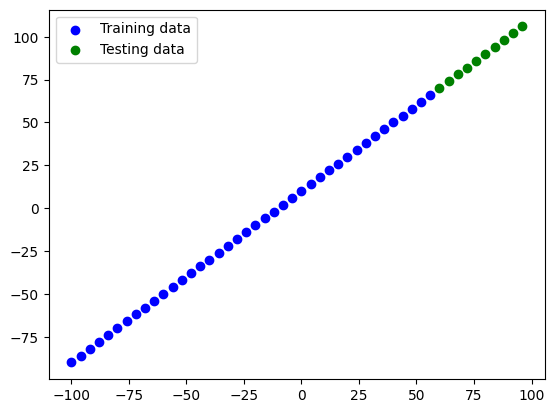

In [14]:
plt.Figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


### Visualizing the Model

In [16]:
# Doesn't work ( model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])



In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- **Total Params** - total number of parameters in the model
- **Trainable parameters** - there are the parameter(patterns) the model can update as it trains
- **Non-trainable parameters** - these parameter aren't updated during (this is typical when you bring in the already learned patterns form other models during transfer learning)

In [19]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Visualizing the predictions

In [22]:
y_preds = model.predict(X_test)

y_preds

1/1 [==============================] - 0s 31ms/step


array([[44.625885],
       [47.512566],
       [50.399254],
       [53.285934],
       [56.172623],
       [59.059303],
       [61.945984],
       [64.83267 ],
       [67.71935 ],
       [70.60603 ]], dtype=float32)

In [23]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

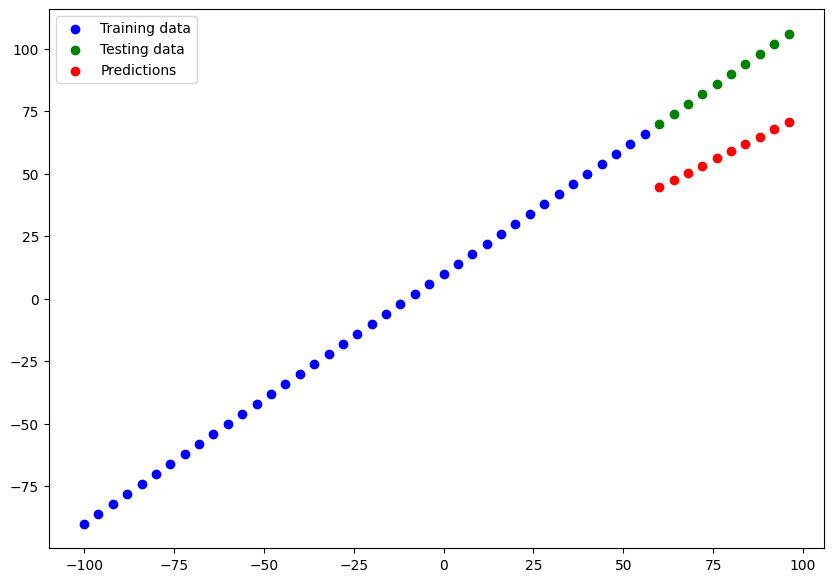

In [24]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions

In [25]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 66ms/step - loss: 30.3840 - mae: 30.3840


[30.3840389251709, 30.3840389251709]

In [26]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_preds)

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.374115, 40.487434, 37.600746, 34.714066, 31.827377, 28.940699,
       26.054016, 23.167328, 20.280647, 17.515173], dtype=float32)>

In [27]:
y_test, y_preds

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[44.625885],
        [47.512566],
        [50.399254],
        [53.285934],
        [56.172623],
        [59.059303],
        [61.945984],
        [64.83267 ],
        [67.71935 ],
        [70.60603 ]], dtype=float32))

In [28]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [29]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [30]:
# look like
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([44.625885, 47.512566, 50.399254, 53.285934, 56.172623, 59.059303,
        61.945984, 64.83267 , 67.71935 , 70.60603 ], dtype=float32))

In [31]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.384039>

In [32]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=933.4154>

In [33]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=30.384039306640624>

In [34]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
     

## Running experiments to improve a model

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).

2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.

3. **Train for longer** - give your model more of a chance to find the patterns in the data.

1. **model_1** - 1 layer, 100 epochs.
2. **model_2** - 2 layers, 100 epochs.
3. **model_3** - 2 layers, 500 epochs

Build **model_1**

In [35]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 36.9252 - mae: 36.9252
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9136 - mae: 9.9136
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 11.3750 - mae: 11.3750
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5221 - mae: 9.5221
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.4234 - mae: 10.4234
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6564 - mae: 9.6564
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7603 - mae: 8.7603
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0669 - mae: 9.0669
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.2140 - mae: 19.2140
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.3764 - mae: 10.3764
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 25ms/step


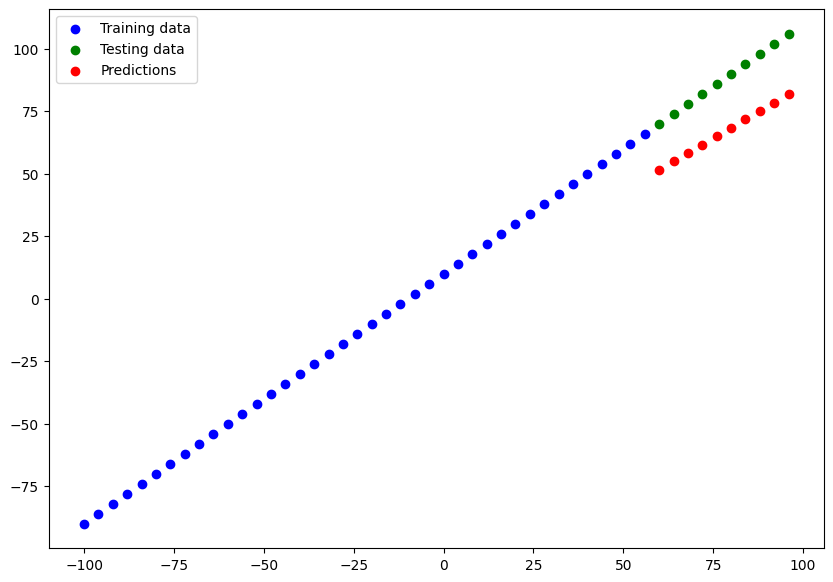

In [36]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [37]:
# Calculate model_1 metrics

mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(21.273703, 456.00742)

Build **model_2**

In [38]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 36.1586 - mae: 36.1586
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 13.8998 - mae: 13.8998
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 19.3903 - mae: 19.3903
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 12.5772 - mae: 12.5772
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 13.6852 - mae: 13.6852
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.9678 - mae: 10.9678
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9284 - mae: 11.9284
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 10.7840 - mae: 10.7840
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 36.9018 - mae: 36.9018
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 24.6625 - mae: 24.6625
Epoch 11/100
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 28ms/step


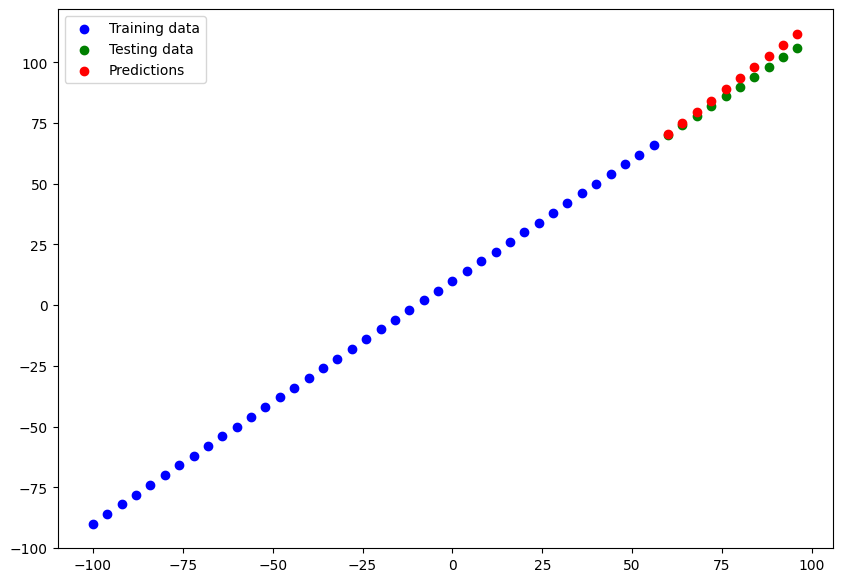

In [39]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

that's looking better already! And all it took was an extra layer.

In [40]:
# Calculate model_2 metrics

mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()

mae_2, mse_2

(3.139012, 12.669317)

Build **model_3**

In [41]:
tf.random.set_seed(42)

# Same with model_2
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 28ms/step


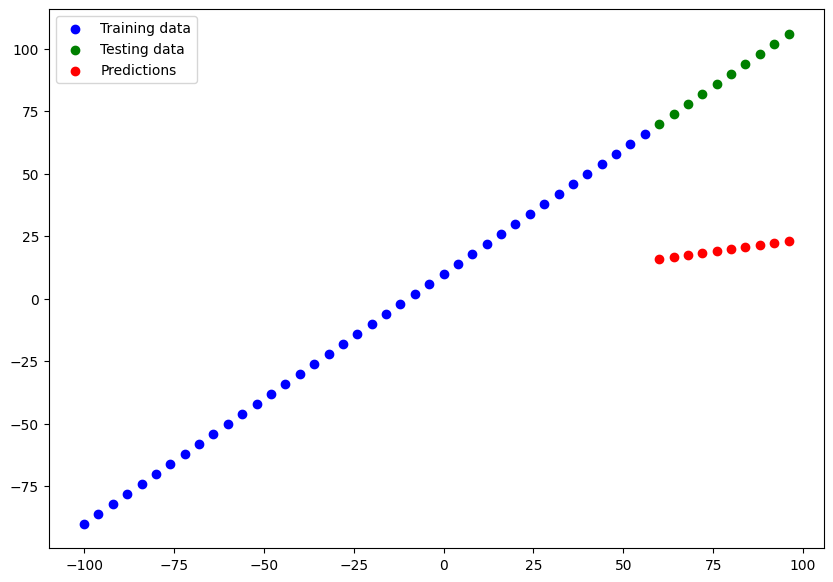

In [42]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [43]:
# Calculate model_3 metrics

mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()

mae_3, mse_3

(68.41567, 4766.4688)

### Comparing results

Now we've got results for 3 similar but slighty different result, let's compare them.

In [44]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [46]:
import pandas as pd

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.273703,456.007416
1,model_2,3.139012,12.669317
2,model_3,68.415672,4766.468750


From our experiments, it looks like **model_2** performed the best


## Saving a model

We have 2 ways to save a model in TensorFlow

1. The <a href="https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#savedmodel_format">SavedModel Format</a> (default). 
2. <a href="https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#hdf5_format">The HDF5 format</a>.

In [47]:
# Save a model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [49]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!dir best_model_SavedModel_format ## for unix use !ls, (I use windows)

 Volume in drive C is Windows
 Volume Serial Number is 78A1-A073

 Directory of c:\Programing\AI\best_model_SavedModel_format

08.06.2023  12:53    <DIR>          .
08.06.2023  12:53    <DIR>          ..
08.06.2023  12:53    <DIR>          assets
08.06.2023  12:53                57 fingerprint.pb
08.06.2023  12:53             6.306 keras_metadata.pb
08.06.2023  12:53            71.033 saved_model.pb
08.06.2023  12:53    <DIR>          variables
               3 File(s)         77.396 bytes
               4 Dir(s)  376.005.738.496 bytes free


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [50]:
# Save a model using the HDF5 format

model_2.save("best_model_HDF5_format.h5")

In [51]:
# Check it out
!dir best_model_HDF5_format.h5

 Volume in drive C is Windows
 Volume Serial Number is 78A1-A073

 Directory of c:\Programing\AI

08.06.2023  12:55            21.952 best_model_HDF5_format.h5
               1 File(s)         21.952 bytes
               0 Dir(s)  375.948.468.224 bytes free


## Loading a model

We can load a saved model using the **load_model()** method.

Loading a model for the different formats(SavedModel and HDF5) is same (as long as the pathnames to the particular formats are correct).

In [52]:
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Now let's test it out

In [53]:
# Compare model_2 with the SavedModel version (should return True)

model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
model_2_preds == saved_model_preds
mae(y_test, model_2_preds.squeeze()).numpy() == mae(y_test, saved_model_preds.squeeze()).numpy()

1/1 [==============================] - 0s 28ms/step


True

Loading in from the HDF5 is much the same.

In [54]:
# Load in a model using the HDF5 format

loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Compare model_2 with the loaded HDF5 version (should return True)

h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == h5_model_preds
mae(y_test, model_2_preds.squeeze()).numpy() == mae(y_test, h5_model_preds.squeeze()).numpy()

1/1 [==============================] - 0s 27ms/step


True

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

- Right click on the file in the files pane and click "download".
- Use the Code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

## A larger example

In [78]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [79]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [81]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [82]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [110]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
                                                    

Now we can build and fit a model (well make it the same as **model_2**)

In [99]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Convert input data to floats
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Fit the model
insurance_model.fit(X_train.values, y_train.values, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 692us/step - loss: 8713.6191 - mae: 8713.6191
Epoch 2/100
34/34 [==============================] - 0s 729us/step - loss: 7854.4702 - mae: 7854.4702
Epoch 3/100
34/34 [==============================] - 0s 652us/step - loss: 7611.2134 - mae: 7611.2134
Epoch 4/100
34/34 [==============================] - 0s 667us/step - loss: 7687.1533 - mae: 7687.1533
Epoch 5/100
34/34 [==============================] - 0s 667us/step - loss: 7674.3643 - mae: 7674.3643
Epoch 6/100
34/34 [==============================] - 0s 667us/step - loss: 7615.3184 - mae: 7615.3184
Epoch 7/100
34/34 [==============================] - 0s 713us/step - loss: 7566.3887 - mae: 7566.3887
Epoch 8/100
34/34 [==============================] - 0s 606us/step - loss: 7756.4751 - mae: 7756.4751
Epoch 9/100
34/34 [==============================] - 0s 727us/step - loss: 7454.0356 - mae: 7454.0356
Epoch 10/100
34/34 [==============================] - 0s 667us/step - loss: 7760.0

In [105]:
# Check the results of the insurance model on the test data
# Convert input data to floats
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Evaluate the model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 753us/step - loss: 7110.6885 - mae: 7110.6885


[7110.6884765625, 7110.6884765625]

In [116]:
tf.random.set_seed(42)

# Add an extra layer & increase number of hidden units in each layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=['mae'])

# Convert input data to NumPy arrays
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Fit the model
history = insurance_model_2.fit(X_train.values, y_train.values, epochs=100, verbose=0)

In [117]:
insurance_model_2.evaluate(X_test.astype('float32').values, y_test.astype('float32').values)


9/9 [==============================] - 0s 750us/step - loss: 4924.6553 - mae: 4924.6553


[4924.6552734375, 4924.6552734375]

Text(0.5, 0, 'epochs')

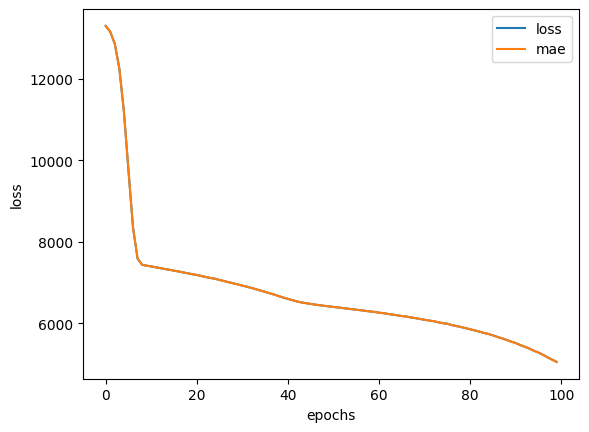

In [118]:
# Plot history ( also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [120]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train.values, y_train.values, epochs=100, verbose=0)

In [121]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test.astype('float32').values, y_test.astype('float32').values)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3497.4714 - mae: 3497.4714


(3497.471435546875, 3497.471435546875)

Text(0.5, 0, 'epochs')

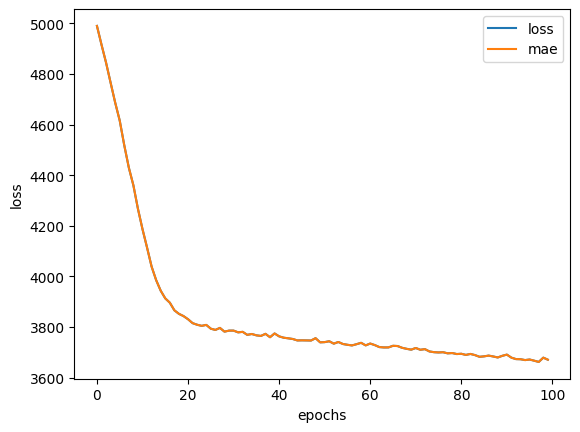

In [122]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

- Turning all of your data to numbers (a neural network can't handle strings).

- Making sure your data is in the right shape (verifying input and output shapes).

- Feature scaling:
    - Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.

    - Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.

    - With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [123]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [124]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [125]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
     


In [127]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [128]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [129]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data is normalized and numerical, let's model it.

We'll use the same model as **insurance_model_2**.

In [132]:
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                                                    optimizer=tf.keras.optimizers.Adam(),
                                                    metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train.values, epochs=200, verbose=0)


In [133]:
insurance_model_3_loss, insurance_model_3_mae =insurance_model_3.evaluate(X_test_normal, y_test.values)

9/9 [==============================] - 0s 750us/step - loss: 3166.9229 - mae: 3166.9229


In [134]:
insurance_model_2_mae, insurance_model_3_mae

(3497.471435546875, 3166.9228515625)